In [1]:
pip install pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


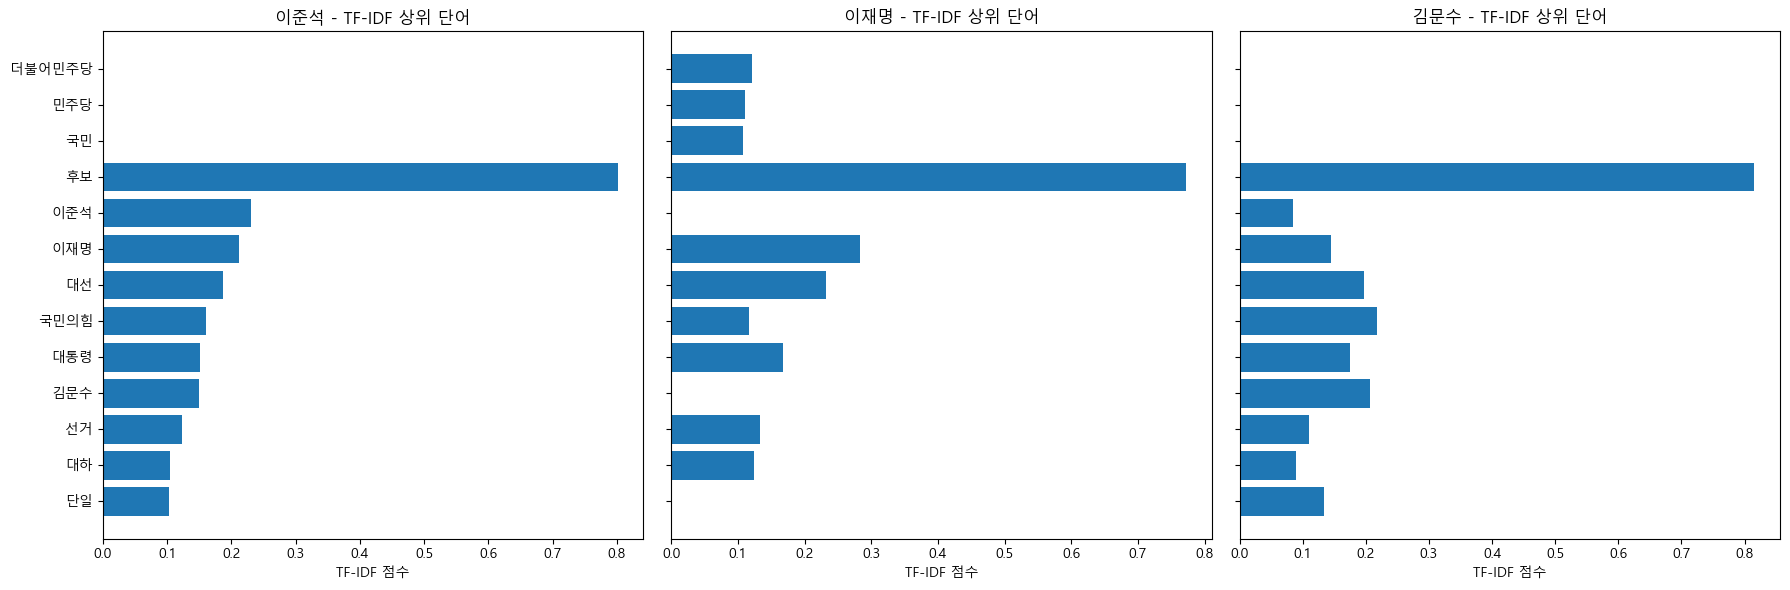

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import matplotlib as mpl

# 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 분석할 파일 목록
file_paths = {
    "이준석": "lee_junseok_tagged_filtered_ver2.csv",
    "이재명": "lee_jaemyung_tagged_filtered.csv",
    "김문수": "kim_moonsu_tagged_filtered.csv"
}


documents = {}

# 파일별로 텍스트 추출
for name, path in file_paths.items():
    df = pd.read_csv(path)
    docs = []
    for sentence in df['tagged'].dropna():
        tokens = []
        for token in sentence.split():
            if '(' in token and ')' in token:
                word = token.rsplit("(", 1)[0]
                tokens.append(word)  # ✅ 이 줄이 필수!
        docs.append(" ".join(tokens))
    documents[name] = " ".join(docs)

# TF-IDF 분석
corpus = list(documents.values())
names = list(documents.keys())
vectorizer = TfidfVectorizer(max_features=100)
X = vectorizer.fit_transform(corpus)
df_tfidf = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf.index):
    top_terms = df_tfidf.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()


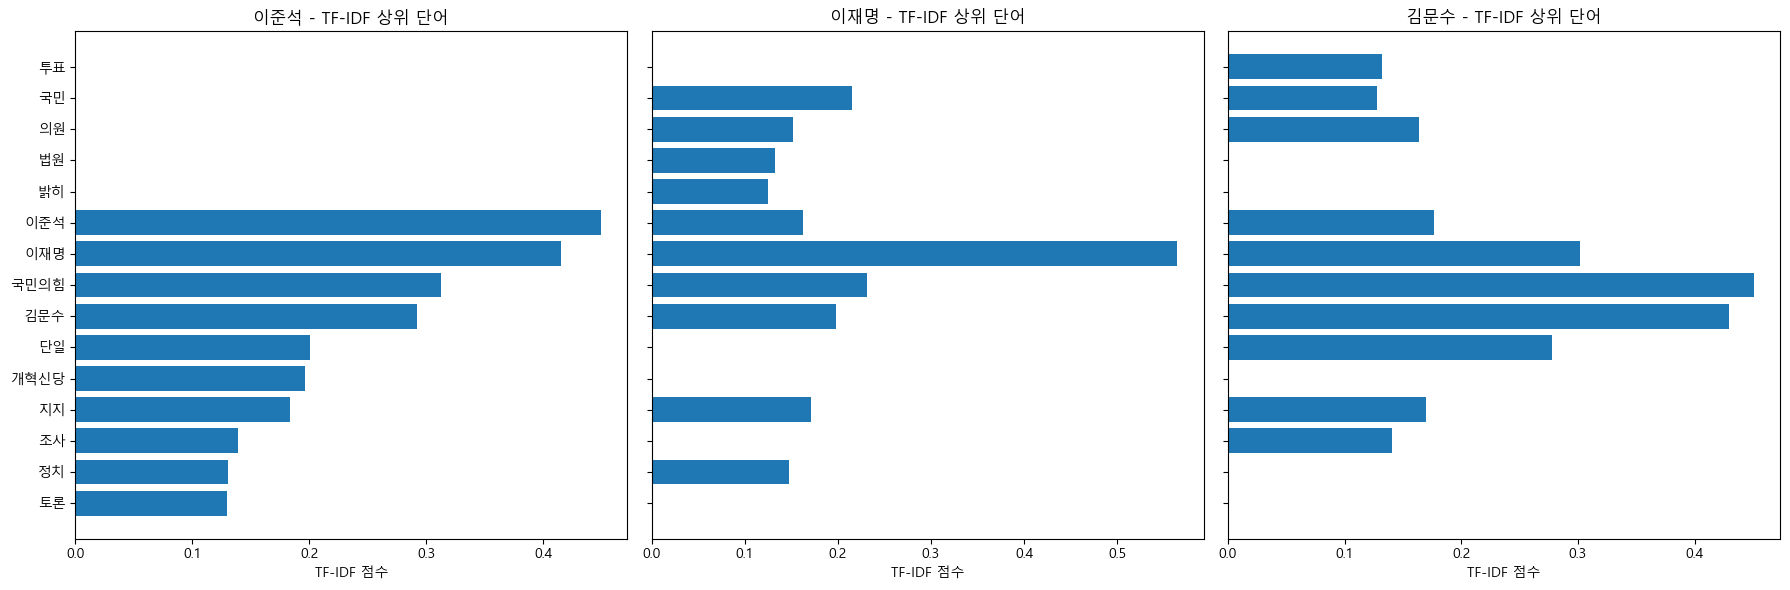

In [2]:
# 공통 단어들 제거
corpus2 = list(documents.values())
names2 = list(documents.keys())

from sklearn.feature_extraction.text import TfidfVectorizer

# 사용자 정의 불용어 리스트
custom_stopwords = ['더불어민주당', '민주당', '후보', '대선', '대통령', '선거', '후보', '대하', '아니', '이날', '위하']

# TF-IDF 벡터라이저 정의
vectorizer = TfidfVectorizer(max_features=100, stop_words=custom_stopwords)
X = vectorizer.fit_transform(corpus)

# 이후 코드는 동일
df_tfidf2 = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=names)

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, name in enumerate(df_tfidf2.index):
    top_terms = df_tfidf2.loc[name].sort_values(ascending=False).head(10)
    axes[i].barh(top_terms.index[::-1], top_terms.values[::-1])
    axes[i].set_title(f"{name} - TF-IDF 상위 단어")
    axes[i].set_xlabel("TF-IDF 점수")

plt.tight_layout()
plt.show()

In [3]:
# 고유 키워드 추출
## 특정 정치인에게만 특이하게 높은 TF-IDF를 보이는 단어를 구분

# 기존 TF-IDF 결과가 담긴 DataFrame: df_tfidf2
# 각 행: 정치인 이름, 각 열: 단어+품사 조합, 값: TF-IDF 점수

# 고유 키워드: 특정 정치인에서만 TF-IDF가 유독 높은 단어
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(10))




이준석의 고유 키워드:
이준석     0.279453
개혁신당    0.131233
토론      0.080971
공약      0.040752
tv      0.040037
토론회     0.036623
단일      0.028014
여성      0.017330
보수      0.016792
정책      0.016778
dtype: float64

이재명의 고유 키워드:
이재명    0.206318
법원     0.116036
사건     0.106615
국민     0.104664
재판     0.084473
선거법    0.060283
내란     0.053120
발언     0.034976
정치     0.034105
통합     0.032843
dtype: float64

김문수의 고유 키워드:
김문수     0.184297
국민의힘    0.178268
단일      0.143011
한덕수     0.070788
경선      0.063309
투표      0.059026
의원      0.047387
사전      0.025008
오후      0.020481
만나      0.017935
dtype: float64


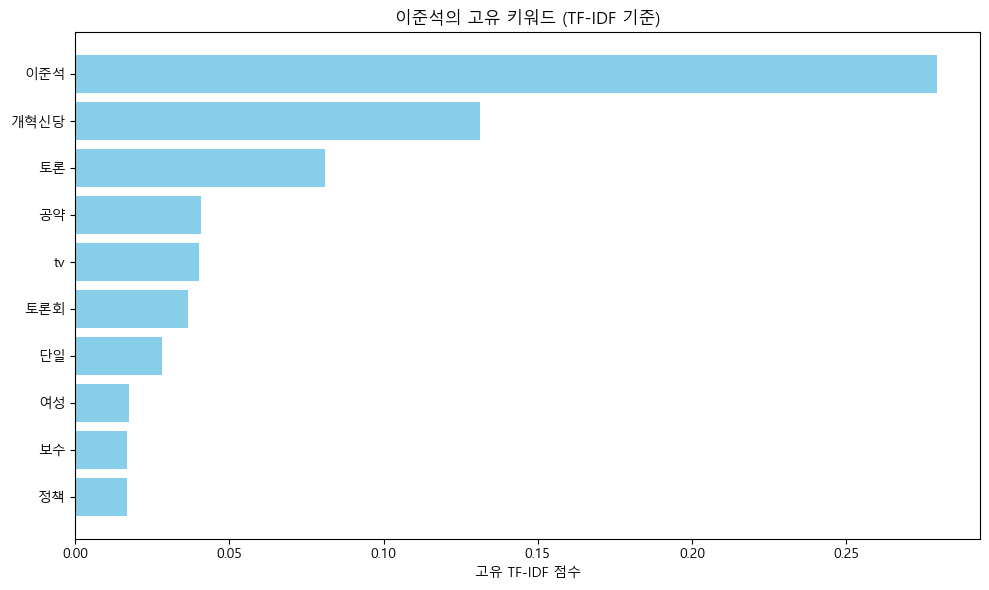

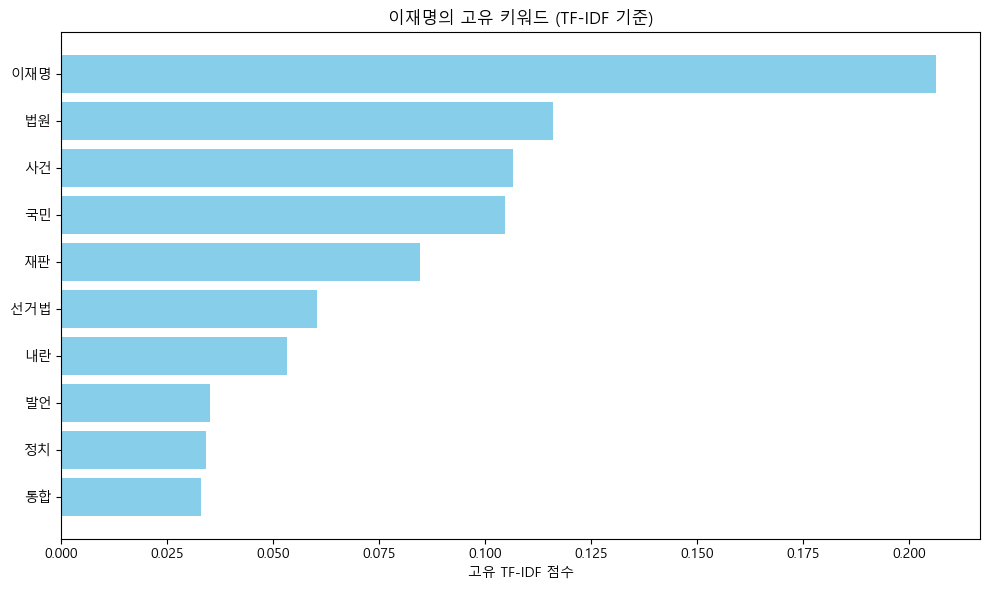

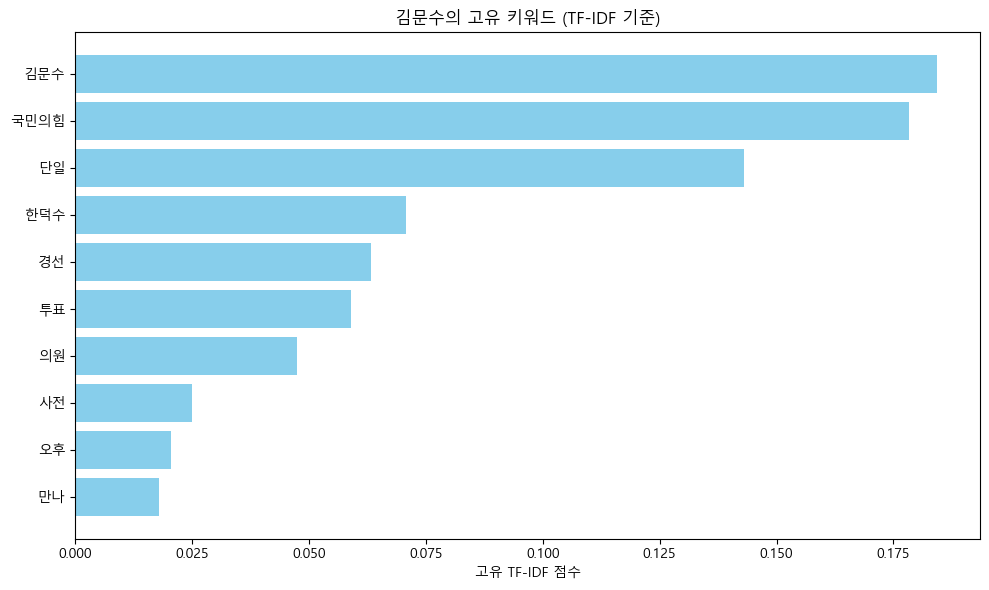

In [4]:
# 고유 키워드 시각화

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 10개
for name in df_tfidf2.index:
    # 고유성 계산: 해당 정치인의 TF-IDF - (다른 정치인 평균)
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    top_dominant = dominant_words.sort_values(ascending=False).head(10)
    
    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()


이준석의 고유 키워드:
이준석     0.279453
개혁신당    0.131233
토론      0.080971
공약      0.040752
tv      0.040037
토론회     0.036623
단일      0.028014
여성      0.017330
보수      0.016792
정책      0.016778
지지      0.012601
경제      0.012526
사회      0.010723
질문      0.009736
정치      0.008475
dtype: float64

이재명의 고유 키워드:
이재명    0.206318
법원     0.116036
사건     0.106615
국민     0.104664
재판     0.084473
선거법    0.060283
내란     0.053120
발언     0.034976
정치     0.034105
통합     0.032843
지역     0.031434
밝히     0.030295
의원     0.029639
만들     0.026499
따르     0.025800
dtype: float64

김문수의 고유 키워드:
김문수     0.184297
국민의힘    0.178268
단일      0.143011
한덕수     0.070788
경선      0.063309
투표      0.059026
의원      0.047387
사전      0.025008
오후      0.020481
만나      0.017935
탄핵      0.015828
윤석열     0.015725
여론      0.015718
위원장     0.014459
대책      0.012844
dtype: float64


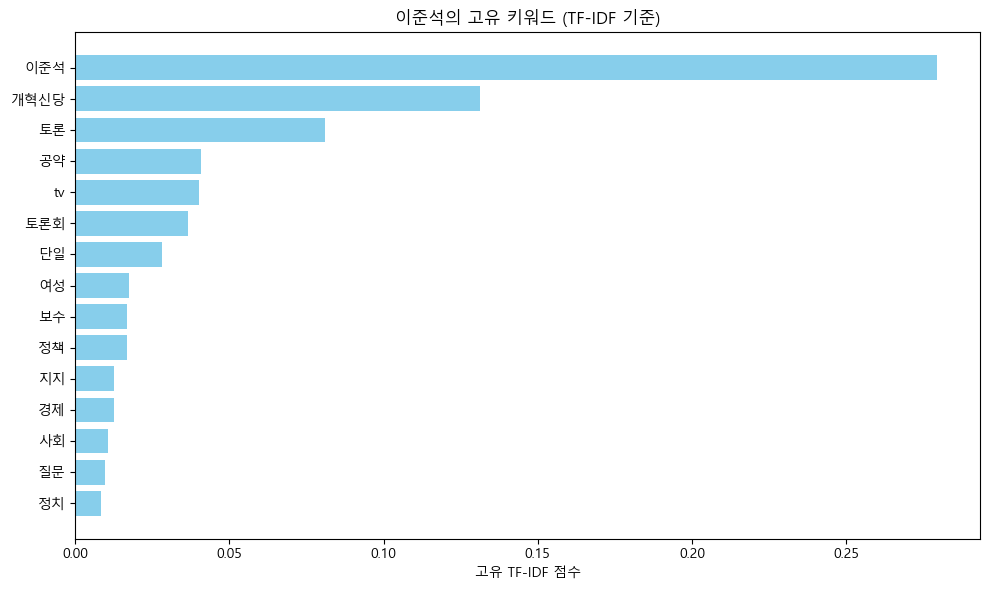

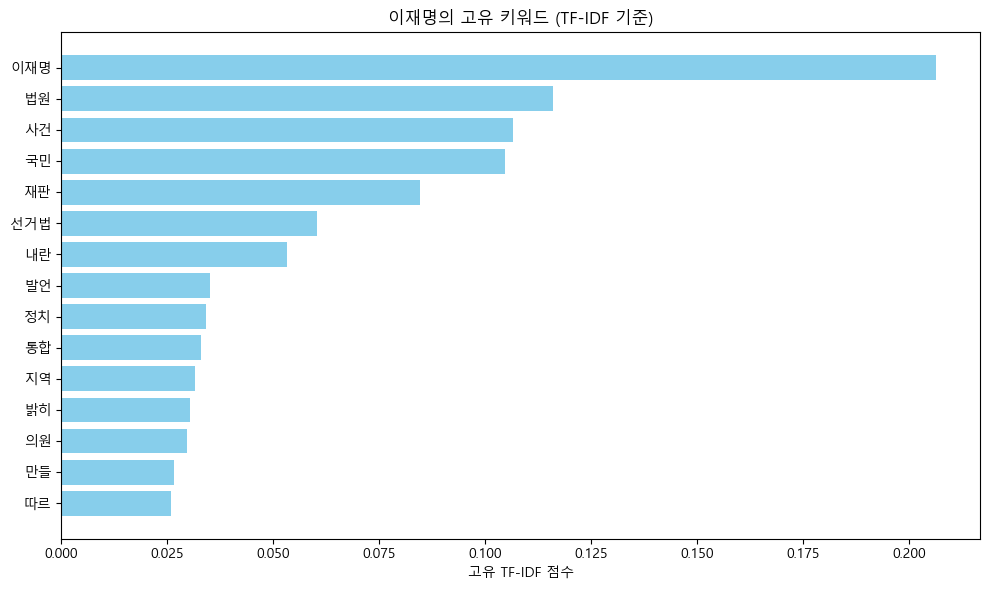

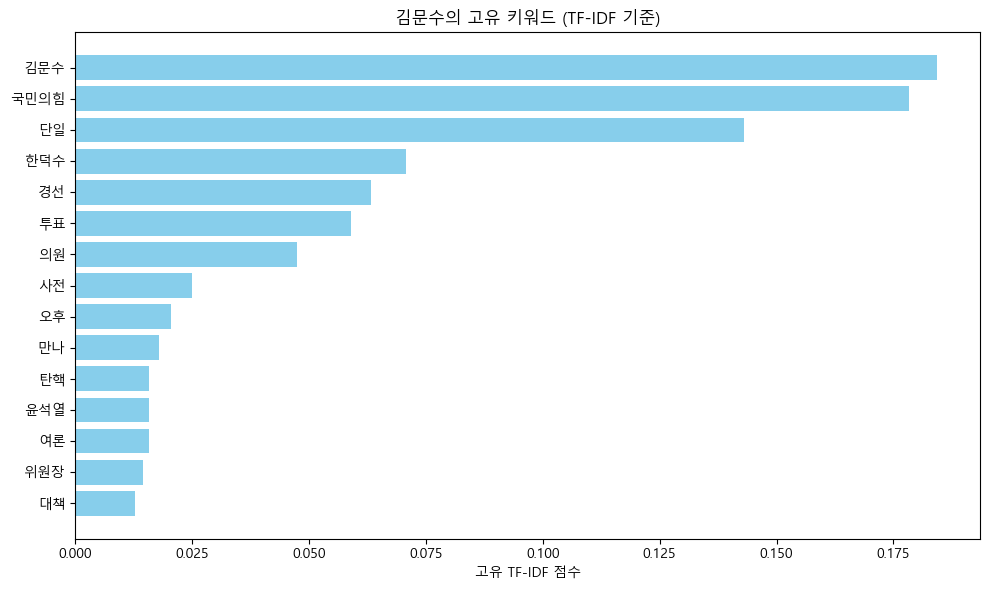

In [5]:
# 사용자 정의 불용어 설정
custom_stopwords = {"이런", "그런"}

# 고유 키워드 추출 (15개)
for name in df_tfidf2.index:
    # TF-IDF 점수에서 다른 후보 평균을 뺀 값 → 고유성 점수
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # 불용어 제거
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    # 상위 15개 고유 키워드 출력
    print(f"\n{name}의 고유 키워드:")
    print(dominant_words.sort_values(ascending=False).head(15))

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화: 정치인별 고유 키워드 상위 15개
for name in df_tfidf2.index:
    dominant_words = df_tfidf2.loc[name] - df_tfidf2.drop(index=name).mean()
    
    # ✅ 여기에도 불용어 제거 적용!
    dominant_words = dominant_words[~dominant_words.index.isin(custom_stopwords)]
    
    top_dominant = dominant_words.sort_values(ascending=False).head(15)

    # 시각화
    plt.figure(figsize=(10, 6))
    plt.barh(top_dominant.index[::-1], top_dominant.values[::-1], color="skyblue")
    plt.title(f"{name}의 고유 키워드 (TF-IDF 기준)")
    plt.xlabel("고유 TF-IDF 점수")
    plt.tight_layout()
    plt.show()
